In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as  np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
column=['season','yr','mnth','holiday','weekday','workingday','weathersit']

In [9]:
for i in column:
    print(df[i].value_counts())

3    188
2    184
1    180
4    178
Name: season, dtype: int64
0    365
1    365
Name: yr, dtype: int64
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
0    709
1     21
Name: holiday, dtype: int64
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64
1    504
0    226
Name: workingday, dtype: int64
1    463
2    246
3     21
Name: weathersit, dtype: int64


##### Dataset Description



###### season 
1 = spring
2 = summer 
3 = fall 
4 = winter

###### holiday
0 = no
1 = yes

###### weather 

1- Clear, Few clouds, Partially cloudy, Partially cloudy

2- Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3- Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4- Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

###### temp 
temperature in Celsius

###### atemp
"feels like" temperature in Celsius

###### humidity 
relative humidity

###### casual 
number of non-registered user rentals initiated

###### registered 
number of registered user rentals initiated

###### count 
number of total rentals




### Data Visualization

In [10]:
df.head(
)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
import seaborn as sns

<AxesSubplot:xlabel='season', ylabel='count'>

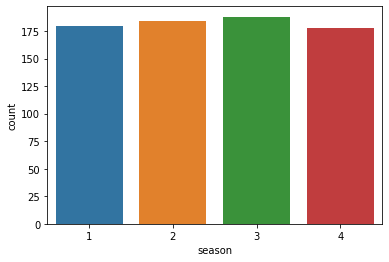

In [12]:
sns.countplot(x=df['season'],data=df)

<AxesSubplot:xlabel='yr', ylabel='count'>

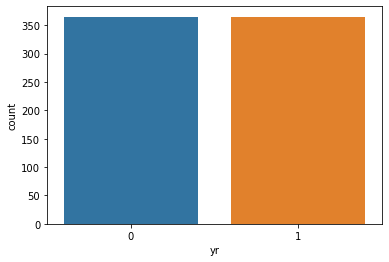

In [13]:
sns.countplot(x=df['yr'],data=df)

<AxesSubplot:xlabel='mnth', ylabel='count'>

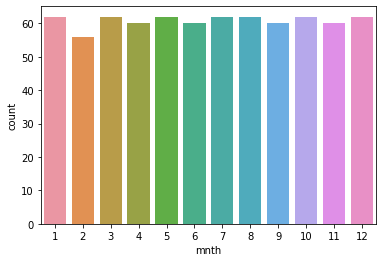

In [14]:
sns.countplot(x=df['mnth'],data=df)

<AxesSubplot:xlabel='holiday', ylabel='count'>

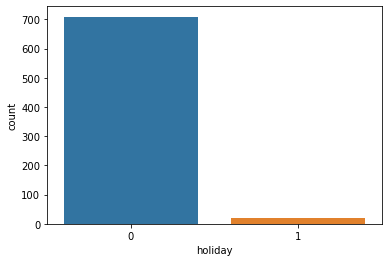

In [15]:
sns.countplot(x=df['holiday'],data=df)

<AxesSubplot:xlabel='weekday', ylabel='count'>

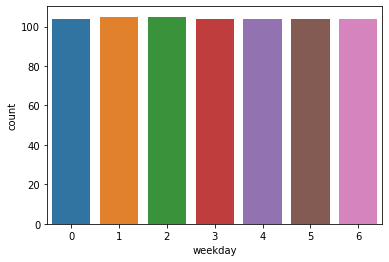

In [16]:
sns.countplot(x=df['weekday'],data=df)

<AxesSubplot:xlabel='workingday', ylabel='count'>

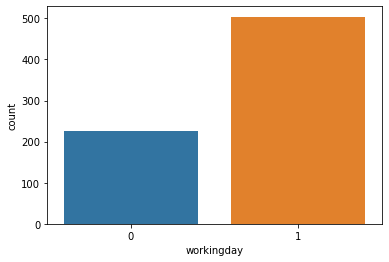

In [17]:
sns.countplot(x=df['workingday'],data=df)

<AxesSubplot:xlabel='weathersit', ylabel='count'>

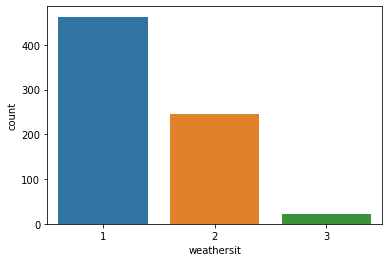

In [18]:
sns.countplot(x=df['weathersit'],data=df)

<AxesSubplot:xlabel='temp', ylabel='Count'>

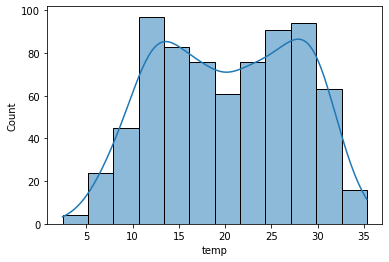

In [19]:
sns.histplot(df['temp'],kde=True)

<AxesSubplot:xlabel='atemp', ylabel='Count'>

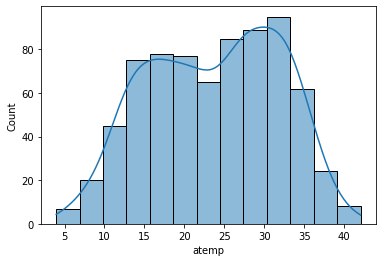

In [20]:
sns.histplot(df['atemp'],kde=True)

<AxesSubplot:xlabel='hum', ylabel='Count'>

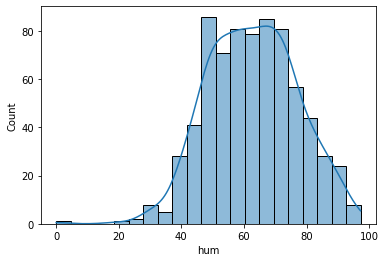

In [21]:
sns.histplot(df['hum'],kde=True)

<AxesSubplot:xlabel='windspeed', ylabel='Count'>

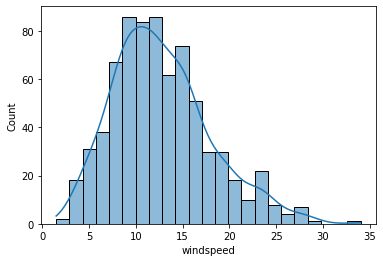

In [22]:
sns.histplot(df['windspeed'],kde=True)

<AxesSubplot:xlabel='casual', ylabel='Count'>

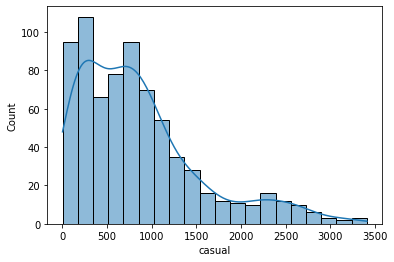

In [23]:
sns.histplot(df['casual'],kde=True)

<AxesSubplot:xlabel='registered', ylabel='Count'>

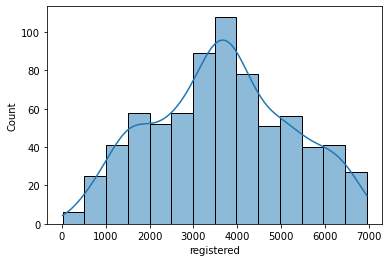

In [24]:
sns.histplot(df['registered'],kde=True)

<AxesSubplot:xlabel='cnt', ylabel='Count'>

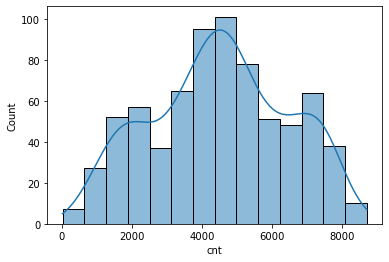

In [25]:
sns.histplot(df['cnt'],kde=True)

In [26]:
column1 = ['temp','atemp','hum','windspeed','casual','registered','cnt']

AxesSubplot(0.125,0.125;0.775x0.755)


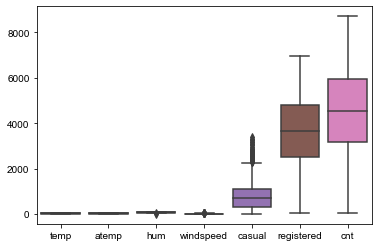

In [27]:
print(sns.boxplot(data=df[['temp','atemp','hum','windspeed','casual','registered','cnt']]))
sns.set(rc={'figure.figsize':(25,8)})

#### Data Prepration

Here we can see that outlier is present in casual column we will remove outlier

##### Outlier handling

In [28]:
Q1,Q3=df['casual'].quantile([0.25,0.75])
Q1,Q3

(316.25, 1096.5)

In [29]:
IQR=(Q3-Q1)

In [30]:
IQR

780.25

In [31]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(-854.125, 2266.875)

In [32]:
df['casual'].mean()

849.2493150684932

In [33]:
df[(df['casual']<lower_limit)|(df['casual']>upper_limit)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
148,149,29-05-2018,2,0,5,0,2,1,1,27.367500,30.77750,81.8750,14.333846,2355,2433,4788
183,184,03-07-2018,3,0,7,0,2,1,2,29.383347,33.42875,68.2500,15.333486,2282,2367,4649
184,185,04-07-2018,3,0,7,1,3,0,2,29.793347,33.27085,63.7917,5.459106,3065,2978,6043
196,197,16-07-2018,3,0,7,0,1,1,1,28.153347,31.91315,58.5000,13.958914,2418,3505,5923
246,247,04-09-2018,3,0,9,0,2,1,1,29.075847,33.27145,74.2083,13.833289,2521,2419,4940
281,282,09-10-2018,4,0,10,0,2,1,1,22.174153,26.19915,72.7500,4.251150,2397,3114,5511
440,441,17-03-2019,1,1,3,0,0,0,2,21.080847,25.25230,75.5833,7.417168,3155,4681,7836
446,447,23-03-2019,2,1,3,0,6,0,2,24.668347,28.50335,69.4167,7.792100,2469,5893,8362
454,455,31-03-2019,2,1,3,0,0,0,2,17.390847,21.08540,73.8333,16.791339,2301,3934,6235
455,456,01-04-2019,2,1,4,0,1,1,2,17.459153,20.86435,67.6250,11.541889,2347,3694,6041


In [34]:
#df_new1=df[(df['casual']>lower_limit)&(df['casual']<upper_limit)]

In [35]:
#print(sns.boxplot(data=df_new1[['temp','atemp','hum','windspeed','casual','registered','cnt']]))
#sns.set(rc={'figure.figsize':(25,8)})

Here we can see that we have removed the outlier and store it in a new dataframe

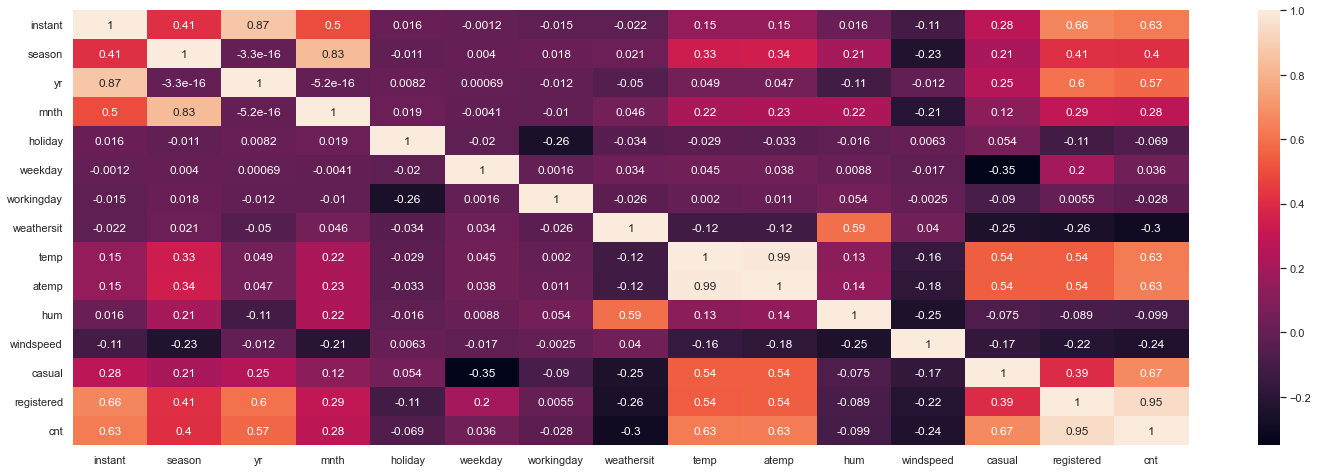

In [36]:
sns.heatmap(data=df.corr(),annot=True)
sns.set(rc={'figure.figsize':(25 ,25)})

In [37]:
df['mnth'].value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [38]:
df['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [39]:
#df_new.drop(['atemp','instant'],axis=1,inplace=True)


In [40]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [41]:
Season=pd.get_dummies(df['season'],prefix='season')

In [42]:
Season.head()

,season_1,season_2,season_3,season_4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [43]:
Weather=pd.get_dummies(df['weathersit'],prefix='Weather')

In [44]:
Weather.head()

,Weather_1,Weather_2,Weather_3
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [45]:
df=pd.concat([df,Weather,Season],axis=1)

In [46]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,casual,registered,cnt,Weather_1,Weather_2,Weather_3,season_1,season_2,season_3,season_4
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,...,331,654,985,0,1,0,1,0,0,0
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,...,131,670,801,0,1,0,1,0,0,0
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,...,120,1229,1349,1,0,0,1,0,0,0
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,...,108,1454,1562,1,0,0,1,0,0,0
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,...,82,1518,1600,1,0,0,1,0,0,0


###### instant- we dropped this column because it is behave like index

###### dteday- we dropped it because i have other option like year

###### season -we dropped it beacuse we already create dummy variable of it 

###### mnth-  we dropped it because season and month is highly correlated

###### casual and registered -  we dropped it because we don't want any role of those variable in our model

###### atemp-  we dropped it because atemp and temp is highly correlated 

In [47]:
df=df.drop(['instant','dteday','season','mnth','casual','registered','atemp'],axis=1)

In [48]:
df.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Weather_1,Weather_2,Weather_3,season_1,season_2,season_3,season_4
0,0,0,1,1,2,14.110847,80.5833,10.749882,985,0,1,0,1,0,0,0
1,0,0,2,1,2,14.902598,69.6087,16.652113,801,0,1,0,1,0,0,0
2,0,0,3,1,1,8.050924,43.7273,16.636703,1349,1,0,0,1,0,0,0
3,0,0,4,1,1,8.200000,59.0435,10.739832,1562,1,0,0,1,0,0,0
4,0,0,5,1,1,9.305237,43.6957,12.522300,1600,1,0,0,1,0,0,0


In [49]:
df.corr()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Weather_1,Weather_2,Weather_3,season_1,season_2,season_3,season_4
yr,1.000000e+00,0.008195,0.000685,-0.011852,-0.050322,0.048789,-0.112547,-0.011624,0.569728,0.031286,-0.005796,-0.073758,3.225068e-16,-1.751358e-17,2.208541e-16,-1.096204e-16
holiday,8.195345e-03,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.015662,0.006257,-0.068764,0.028600,-0.018668,-0.029619,3.464187e-02,-2.440810e-02,-2.639258e-02,1.678505e-02
weekday,6.852851e-04,-0.020145,1.000000,0.001588,0.034216,0.044876,0.008780,-0.017230,0.036183,-0.020058,0.001466,0.053651,-9.953364e-03,2.771750e-03,1.374814e-02,-6.812228e-03
workingday,-1.185197e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.053770,-0.002453,-0.027640,0.045153,-0.061689,0.044340,-2.250665e-02,1.340523e-02,-5.402253e-03,1.453809e-02
weathersit,-5.032247e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,0.590277,0.039769,-0.295929,-0.954244,0.792865,0.507512,1.159531e-02,8.160557e-03,-1.045509e-01,8.657905e-02
temp,4.878919e-02,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.128565,-0.158186,0.627044,0.114794,-0.096297,-0.058461,-6.194080e-01,1.548756e-01,6.782830e-01,-2.255900e-01
hum,-1.125471e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,1.000000,-0.248506,-0.098543,-0.574367,0.490628,0.267592,-1.848840e-01,-2.870035e-03,2.413415e-02,1.639076e-01
windspeed,-1.162435e-02,0.006257,-0.017230,-0.002453,0.039769,-0.158186,-0.248506,1.000000,-0.235132,-0.004234,-0.037177,0.117332,1.788801e-01,9.742067e-02,-1.398857e-01,-1.356120e-01
cnt,5.697285e-01,-0.068764,0.036183,-0.027640,-0.295929,0.627044,-0.098543,-0.235132,1.000000,0.251010,-0.170686,-0.240602,-5.617018e-01,1.453245e-01,3.459080e-01,6.461909e-02
Weather_1,3.128575e-02,0.028600,-0.020058,0.045153,-0.954244,0.114794,-0.574367,-0.004234,0.251010,1.000000,-0.938814,-0.226632,-2.088085e-02,-2.424566e-02,1.090222e-01,-6.554689e-02


##### Machine Learning

In [50]:
x=df.drop(['cnt'],axis=1)

In [51]:
y=df['cnt']

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(584, 15)
(146, 15)
(584,)
(146,)


### HyperParameter Tunning

In [55]:
model_params1={
   'ExtraTreesRegressor': {
        'model': ExtraTreesRegressor(),
        'params':{
            'criterion':['mae','mse'],
            'max_depth':[1,2,3,4,5,6,7]
            
        }
   },
    "svm":{
        'model':SVR(),
        'params':{
            'C':[10,20,30],
            'kernel':['rbf','linear']
        }
    },
    'random forest':{
        'model':RandomForestRegressor(),
        'params':{
            "n_estimators":[50,60,70,90,100,110,120,200],
             "criterion":['mae','mse'],
              'max_depth':[2,3,4,5,6,7,8,9,10]
    
        }
    },
    'knn':{
        'model':KNeighborsRegressor(),
        'params':{
            'n_neighbors':[3,4,5,6,7,8]
        }
    },
    'Linear_Regression':{
        'model':LinearRegression(),
        'params':{
            
        }
            
        
    }
    
        }
   

In [56]:
for model_name, mp in model_params1.items():
    print(mp)


{'model': ExtraTreesRegressor(), 'params': {'criterion': ['mae', 'mse'], 'max_depth': [1, 2, 3, 4, 5, 6, 7]}}
{'model': SVR(), 'params': {'C': [10, 20, 30], 'kernel': ['rbf', 'linear']}}
{'model': RandomForestRegressor(), 'params': {'n_estimators': [50, 60, 70, 90, 100, 110, 120, 200], 'criterion': ['mae', 'mse'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}}
{'model': KNeighborsRegressor(), 'params': {'n_neighbors': [3, 4, 5, 6, 7, 8]}}
{'model': LinearRegression(), 'params': {}}


In [57]:
scores = []
for model_name, mp in model_params1.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5,return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model' : model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [58]:
best_parameter =pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [59]:
best_parameter

,model,best_score,best_params
0,ExtraTreesRegressor,0.853894,"{'criterion': 'mae', 'max_depth': 7}"
1,svm,0.777564,"{'C': 30, 'kernel': 'linear'}"
2,random forest,0.860215,"{'criterion': 'mae', 'max_depth': 10, 'n_estim..."
3,knn,0.544756,{'n_neighbors': 8}
4,Linear_Regression,0.799853,{}


In [60]:
best_parameter['best_params'][2]

{'criterion': 'mae', 'max_depth': 10, 'n_estimators': 200}

#### Here we see that our two model almost gives best accuracy that is random forest regressor and extra trees regressor
### We take Random Forest Regressor

In [61]:
model=RandomForestRegressor(criterion='mse', max_depth= 10, n_estimators= 110,random_state=42)

In [62]:
model.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=10, n_estimators=110,
                      random_state=42)

##### Predicting and Evaluating on test Data

In [63]:
y_pred_test=model.predict(x_test)

In [64]:
r2_score(y_pred_test,y_test)

0.904479403665645

## 90 % Accuracy on Test Data

##### Predicting and Evaluating on train Data

In [65]:
y_pred_train=model.predict(x_train)

In [66]:
r2_score(y_pred_train,y_train)

0.9725966440424479

## 97% Accuracy on train Data

In [67]:
feature_importance=pd.DataFrame({
    'model':model.feature_importances_ },index=x_train.columns)

In [68]:
feature_importance

,model
yr,0.273580
holiday,0.004343
weekday,0.011764
workingday,0.004042
weathersit,0.012611
temp,0.495894
hum,0.061233
windspeed,0.042143
Weather_1,0.004221
Weather_2,0.002472


<AxesSubplot:>

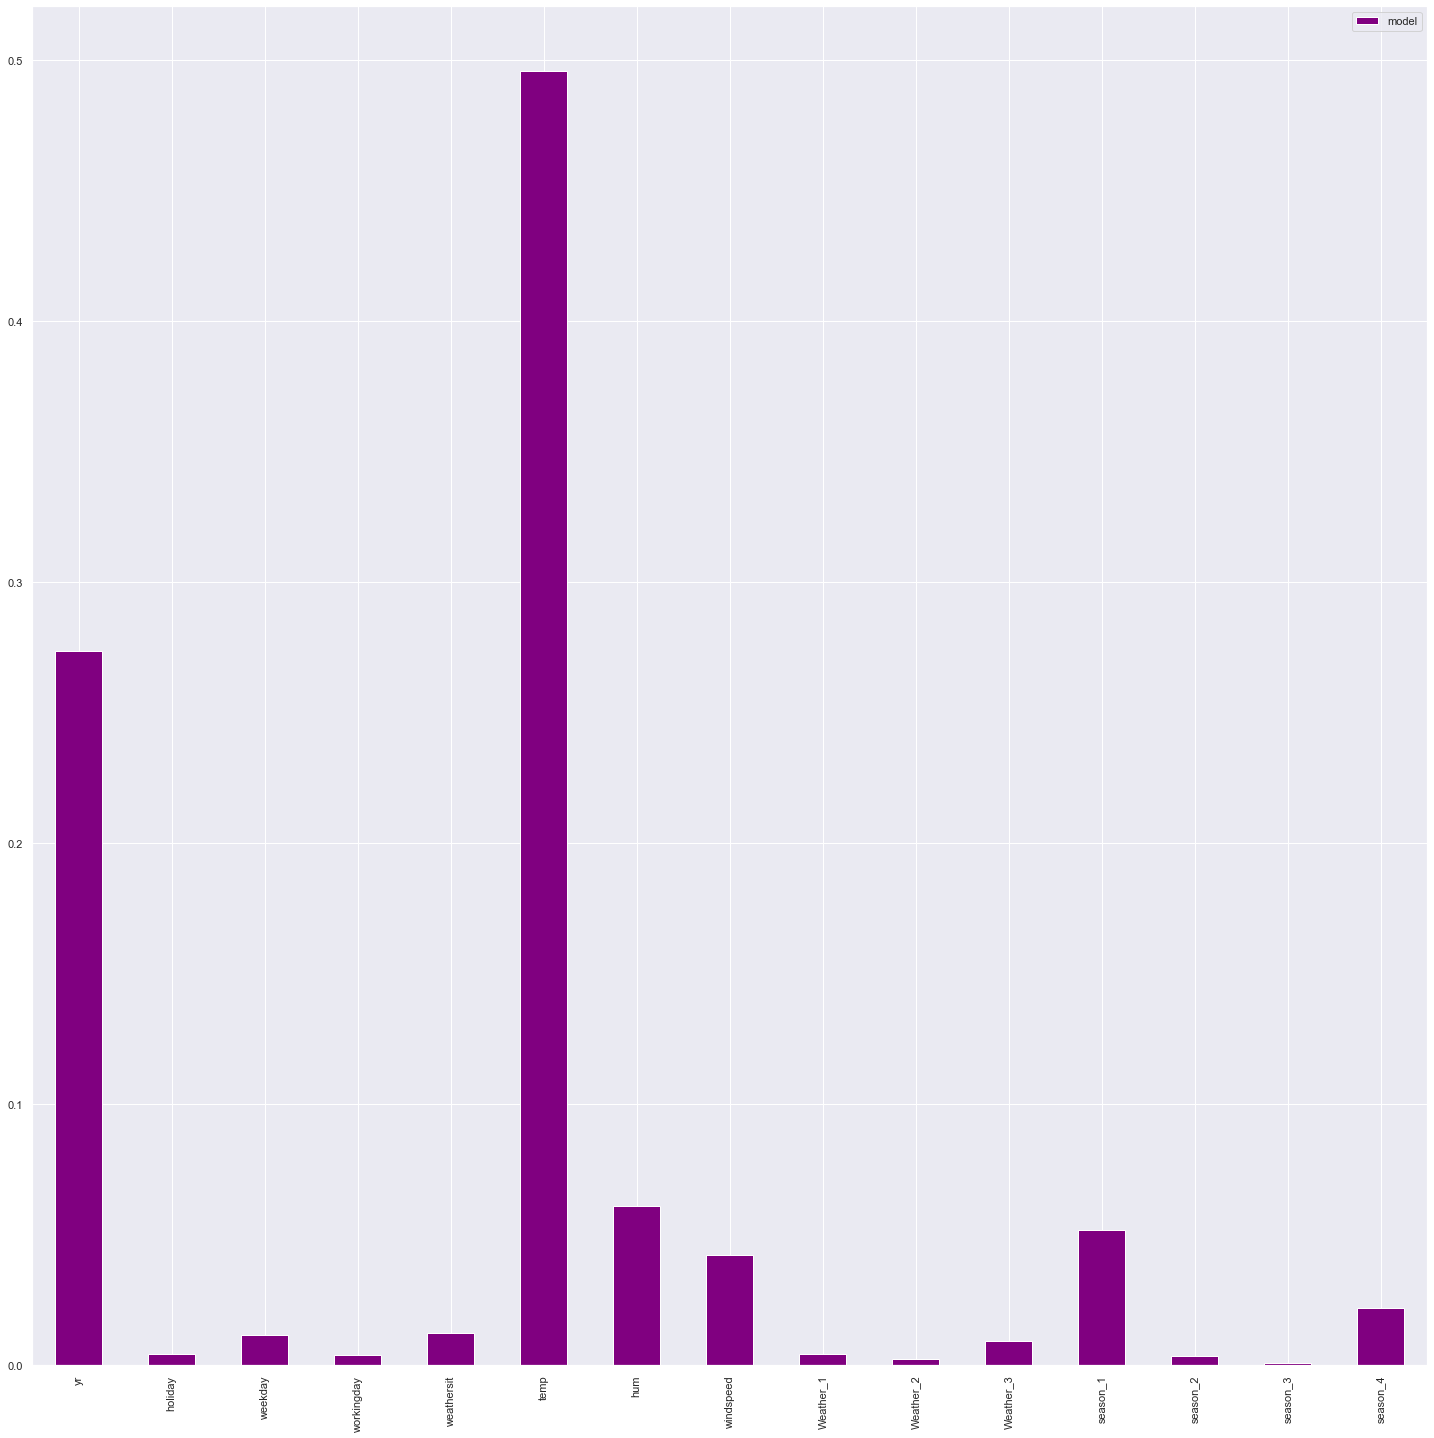

In [69]:
feature_importance.plot(kind='bar',color='purple')